In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# --- 1. Preprocessing and Basic Transforms (no augmentation) ---
transform_basic = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [ ]:
# --- 2. Load Custom Digits for Training ---
def ProjectDataLoader(path='./digits', transform=None):
    images, labels = [], []
    for filename in os.listdir(path):
        if filename.endswith('.png'):
            label = int(filename.split('-')[0])
            img_path = os.path.join(path, filename)
            img = Image.open(img_path).convert('L').resize((28, 28))
            if transform:
                img = transform(img)
            else:
                img = transforms.ToTensor()(img)
            images.append(img)
            labels.append(label)
    return torch.stack(images), torch.tensor(labels).long().squeeze()

custom_batch, custom_labels_tensor = ProjectDataLoader('./digits', transform=transform_basic)
custom_dataset = TensorDataset(custom_batch, custom_labels_tensor)
trainloader = DataLoader(custom_dataset, batch_size=16, shuffle=True)

In [ ]:
# --- 3. Load MNIST for Testing Only ---
testset = datasets.MNIST('MNIST_data', train=False, download=True, transform=transform_basic)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# --- 4. Define the Bigger MLP Model ---
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

Epoch 1 Loss: 2.3249
Epoch 2 Loss: 2.3223
Epoch 3 Loss: 2.3160
Epoch 4 Loss: 2.3037
Epoch 5 Loss: 2.3003
Epoch 6 Loss: 2.2919
Epoch 7 Loss: 2.2781
Epoch 8 Loss: 2.2245
Epoch 9 Loss: 2.1299
Epoch 10 Loss: 2.1378
Epoch 11 Loss: 2.0186
Epoch 12 Loss: 1.9685
Epoch 13 Loss: 1.8645
Epoch 14 Loss: 1.7706
Epoch 15 Loss: 1.6964
Epoch 16 Loss: 1.6906
Epoch 17 Loss: 1.6956
Epoch 18 Loss: 1.6998
Epoch 19 Loss: 1.6582
Epoch 20 Loss: 1.4731
Epoch 21 Loss: 1.4427
Epoch 22 Loss: 1.4079
Epoch 23 Loss: 1.3381
Epoch 24 Loss: 1.3881
Epoch 25 Loss: 1.3984
Epoch 26 Loss: 1.4333
Epoch 27 Loss: 1.3192
Epoch 28 Loss: 1.3366
Epoch 29 Loss: 1.3290
Epoch 30 Loss: 1.3095
Epoch 31 Loss: 1.2217
Epoch 32 Loss: 1.2165
Epoch 33 Loss: 1.1670
Epoch 34 Loss: 1.2174
Epoch 35 Loss: 1.2346
Epoch 36 Loss: 1.2604
Epoch 37 Loss: 1.2415
Epoch 38 Loss: 1.1963
Epoch 39 Loss: 1.1476
Epoch 40 Loss: 1.2031
Epoch 41 Loss: 1.0654
Epoch 42 Loss: 1.0974
Epoch 43 Loss: 1.0354
Epoch 44 Loss: 1.0227
Epoch 45 Loss: 1.0429
Epoch 46 Loss: 1.09

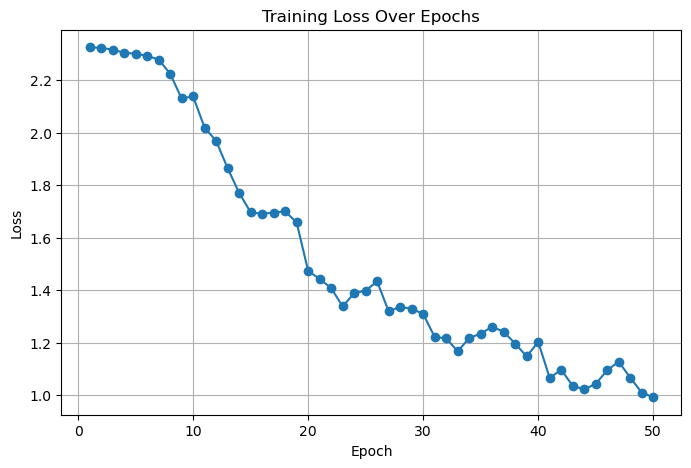

In [ ]:
# --- 5. Setup Loss and Optimizer ---
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- 6. Training Loop (No Transformations) ---
loss_history = []
for epoch in range(50):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader)
    loss_history.append(epoch_loss)
    print(f"Epoch {epoch+1} Loss: {epoch_loss:.4f}")

# --- 7. Plot Training Loss ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_history)+1), loss_history, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


Accuracy on MNIST test set: 42.61%


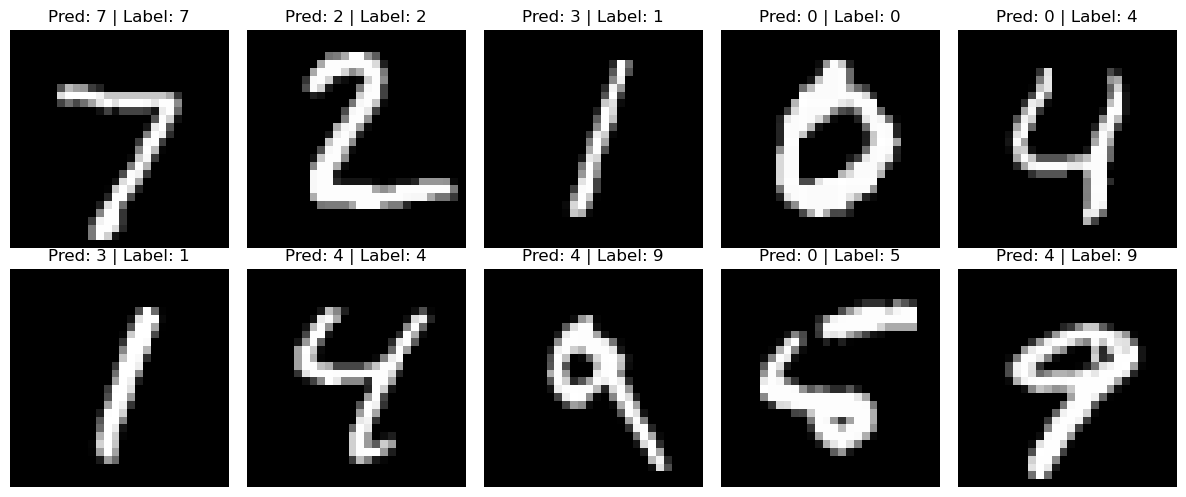

In [ ]:
# --- 8. Testing on MNIST Test Set ---
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nAccuracy on MNIST test set: {100 * correct / total:.2f}%")

# --- 9. (Optional) Visualize a Few Test Predictions ---
def show_mnist_predictions(model, testloader):
    model.eval()
    images, labels = next(iter(testloader))
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    fig, axs = plt.subplots(2, 5, figsize=(12, 5))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i][0], cmap='gray')
        ax.set_title(f"Pred: {preds[i].item()} | Label: {labels[i].item()}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

show_mnist_predictions(model, testloader)